#### CS985: Machine Learning for Data Analytics: Assignment 1
#### Group 35: Tim Hortons  

1. Olivier Delree: 202278679 
2. Rowan Craig:    202253594
3. Eilidh Pike:    202274131
4. Aparna Asokan:  202251020 

#### Exploratory Data Analysis

In [ ]:
#importing required libraries. 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import cluster
from sklearn import metrics
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')
#from google.colab import files
#uploaded = files.upload()
# Importing the dataset
train = pd.read_csv("CS98XClassificationTrain.csv")
test = pd.read_csv("CS98XClassificationTest.csv")


The following dataset was taken from Spotify (available here: https://www.kaggle.com/datasets/cnic92/spotify-past-decades-songs-50s10s). <br>


Below is a list of the attributes given for each song in the dataset and the corresponding column title.

- id: unique identifier
- title: track title
- artist: song artist
- top genre: genre of the track
- year: year of release (or re-release)
- bpm: tempo (beats per minute)
- nrgy: the higher the value the more energetic (energy)
- dnce: the higher the value, the easier it is to dance to this song (danceability)
- dB: the higher the value, the louder the song (loudness, decibels)
- live: the higher the value, the more likely the song is a live recording (liveness)
- val: the higher the value, the more positive mood for the song (valence)
- dur: the length of the song (duration)
- acous: the higher the value the more acoustic the song is (acousticness)
- spch: the higher the value the more spoken word the song contains (speechiness)
- pop: the higher the value the more popular the song is (popularity)

The focus of this classification task is to correctly predict the genre of the provided songs. <br>


Dropping selected columns not relevant to predicting either the popularity or the genre of a song. 

Id - not needed for either problem. 



In [ ]:
Id = test.Id
train = train.drop(columns=['Id'])
test = test.drop(columns=['Id'])

We chose to rename the columns to improve their readability. 

In [ ]:
train = train.rename(columns={'title': 'Title', 
                        'artist': 'Artist',
                        'top genre': 'Genre',
                        'year': 'Year',
                        'bpm': 'Tempo',
                        'nrgy': 'Energy',
                        'dnce': 'Danceability',
                        'dB': 'Loudness',
                        'live': 'Liveness',
                        'val': 'Positivity',
                        'dur': 'Duration',
                        'acous': 'Acousticness',
                        'spch': 'Speechiness',
                        'pop': 'Popularity'
                        })

test = test.rename(columns={'title': 'Title', 
                        'artist': 'Artist',
                        'top genre': 'Genre',
                        'year': 'Year',
                        'bpm': 'Tempo',
                        'nrgy': 'Energy',
                        'dnce': 'Danceability',
                        'dB': 'Loudness',
                        'live': 'Liveness',
                        'val': 'Positivity',
                        'dur': 'Duration',
                        'acous': 'Acousticness',
                        'spch': 'Speechiness',
                        'pop': 'Popularity'
                        })

#### Summary Statistics

In [ ]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         453 non-null    object
 1   Artist        453 non-null    object
 2   Year          453 non-null    int64 
 3   Tempo         453 non-null    int64 
 4   Energy        453 non-null    int64 
 5   Danceability  453 non-null    int64 
 6   Loudness      453 non-null    int64 
 7   Liveness      453 non-null    int64 
 8   Positivity    453 non-null    int64 
 9   Duration      453 non-null    int64 
 10  Acousticness  453 non-null    int64 
 11  Speechiness   453 non-null    int64 
 12  Popularity    453 non-null    int64 
 13  Genre         438 non-null    object
dtypes: int64(11), object(3)
memory usage: 49.7+ KB


In [ ]:
#Calculating percentage of NaN values
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns, 'percent_missing': percent_missing})
missing_value_train.sort_values('percent_missing', inplace=True)

The above two output tables provide a summary of our data contained in a Pandas DataFrame. The summary shows that we have 453 observations to analyze.

From a preliminary glance at the obtained dataframe, we can see that there are some missing values represented as NaNs. There are 15 (3.3%) values missing from the Genre column.

#### Dropping missing values and duplicates:

In [ ]:
train = train.dropna()
train = train.drop_duplicates()
train = train.drop(columns=['Energy', 'Positivity', 'Title', 'Artist'])
test = test.drop(columns=['Energy', 'Positivity', 'Title', 'Artist'])

#### Checking for multicollinearity

Text(0.5, 1.0, 'Correlational Heatmap')

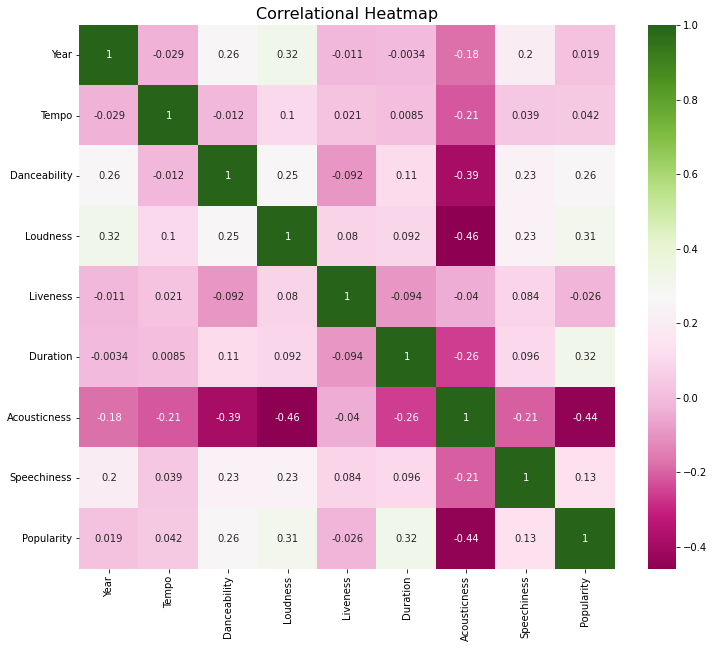

In [ ]:
corr = train.corr() 
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2g', cmap = 'PiYG')
plt.title('Correlational Heatmap', size = 16, c = 'black')

The heatmap observed some strong positive correlations:

Energy and Loudness (0.69)
Danceability and Positivity (0.47)
Energy and Positivity (0.41)
Energy and Danceability (0.35)

Energy and positvity were dropped due to being multicollinear features. 

#### Checking for Outliers

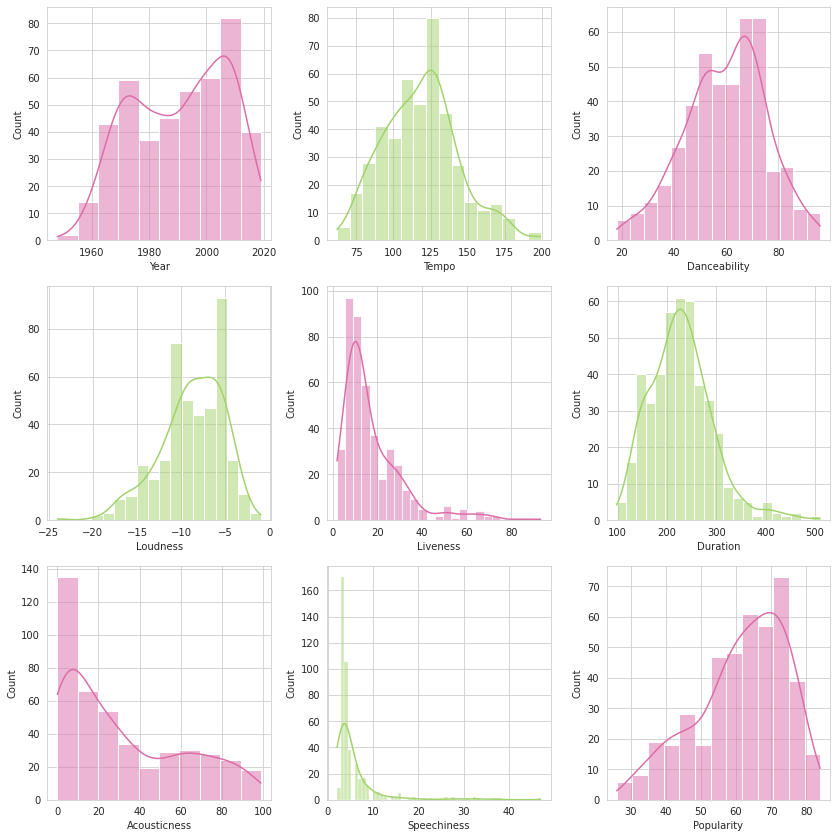

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(12, 12))
f.tight_layout(pad=2.5)
sns.set_style('whitegrid')
sns.histplot(train["Year"], ax=axes[0, 0], color = '#DB6DA8', kde = True)
sns.histplot(train["Tempo"], ax=axes[0, 1], color = '#A1D26B', kde = True)
sns.histplot(train["Danceability"], ax=axes[0, 2], color = '#DB6DA8', kde = True)
sns.histplot(train["Loudness"], ax=axes[1, 0], color = '#A1D26B', kde = True)
sns.histplot(train["Liveness"], ax=axes[1, 1], color = '#DB6DA8', kde = True)
sns.histplot(train["Duration"], ax=axes[1, 2], color = '#A1D26B', kde = True)
sns.histplot(train["Acousticness"], ax=axes[2, 0], color = '#DB6DA8', kde = True)
sns.histplot(train["Speechiness"], ax=axes[2, 1], color = '#A1D26B', kde = True)
sns.histplot(train["Popularity"], ax=axes[2, 2], color = '#DB6DA8', kde = True)
plt.show()

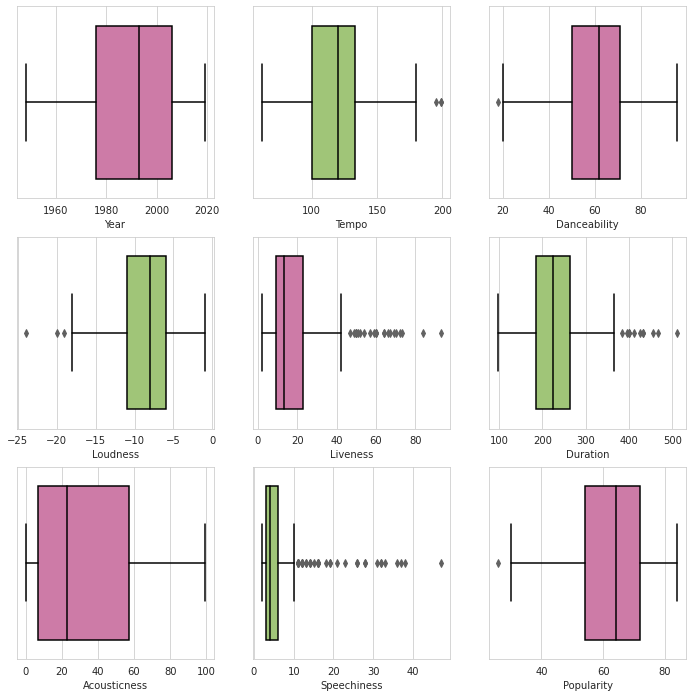

In [ ]:
props = {'whiskerprops': {'color': 'black'}, 'boxprops': {'edgecolor': 'black'}, 'capprops': {'color': 'black'},
         'medianprops': {'color': 'black'}}
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.set_style('whitegrid')
sns.boxplot( train["Year"], ax=axes[0, 0],  color = '#DB6DA8', **props)
sns.boxplot( train["Tempo"] , ax=axes[0, 1], color = '#A1D26B', **props)
sns.boxplot( train["Danceability"], ax=axes[0, 2],  color = '#DB6DA8', **props)
sns.boxplot( train["Loudness"] , ax=axes[1, 0], color = '#A1D26B', **props)
sns.boxplot( train["Liveness"] ,  ax=axes[1, 1],  color = '#DB6DA8', **props)
sns.boxplot( train["Duration"] ,  ax=axes[1, 2], color = '#A1D26B', **props)
sns.boxplot( train["Acousticness"] ,  ax=axes[2, 0], color = '#DB6DA8', **props)
sns.boxplot( train["Speechiness"] ,  ax=axes[2, 1], color = '#A1D26B', **props)
sns.boxplot( train["Popularity"] ,  ax=axes[2, 2], color = '#DB6DA8', **props)
plt.show()

The above boxplots demonstrate that there are outliers within the Liveness, Duration and Speechiness columns. It is, however, shown in the histograms above that these variables all have leptokurtic distributions with positive (right) skew. We opt not to remove these outliers as it is a small dataset and we have already dropped 15 missing values and these actions together could affect the strength of the models. 



The data does not appear linearly separable in most cases and so further specific analyses between variables must take place. 

For the classification problem, we must predict the genre of the song given the set of variables. It is possible that: 

1. Certain artists will stay within the genre they normally produce music in. 
2. Songs in certain genres are more danceable than others. 
3. Certain genres were popular in specific years and so there may be a relevant relationship between popularity, year, and genre. 
4. Shorter songs are of a specific genre. 
5. Acoustic songs and speechier songs may belong to different genres. 


#### Artist and Genre

The below graphs represent the top and bottom 10 value counts of genre.

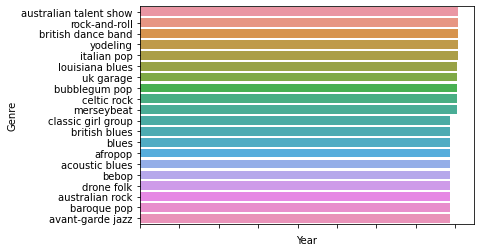

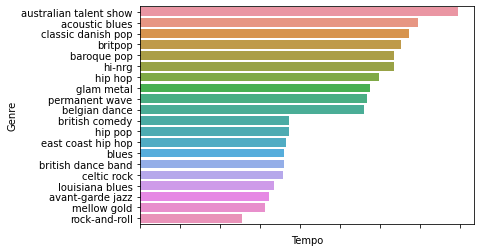

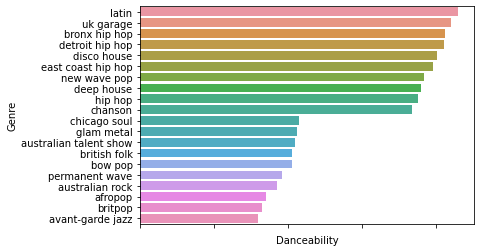

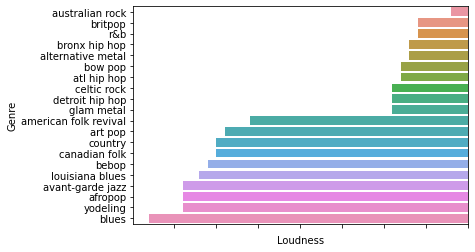

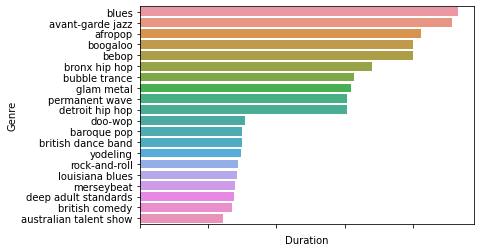

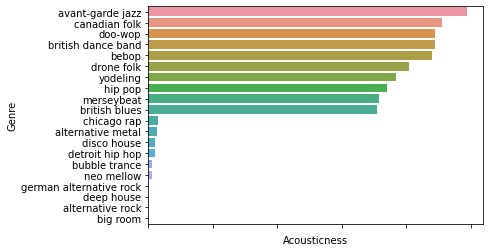

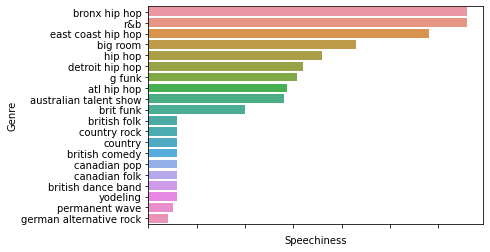

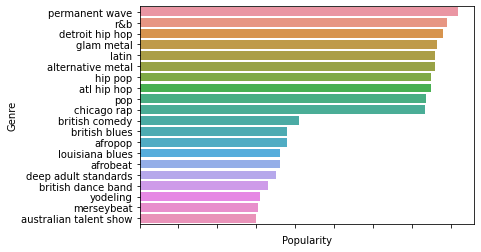

In [ ]:
attribute_list = ["Year", "Tempo", "Danceability", "Loudness", "Duration", "Acousticness", "Speechiness", "Popularity"]
for name in attribute_list:
    Genre_sorted_means = train.loc[:, ("Genre", name)].groupby("Genre").mean().sort_values(by=name, ascending=False)
    tmp_train = pd.concat([Genre_sorted_means.head(10), Genre_sorted_means.tail(10)])
    plot = sns.barplot(data=tmp_train, x=name, y=tmp_train.index)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment="right")
    plt.show()

##### Data Preprocessing 

In [ ]:
#Separating the outcome and attritbutes 
outcome = train['Genre'] # Target variable: Genre
attributes = train.drop('Genre', axis=1) # Stores the attributes affecting genres
#splitting the data into training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(attributes, outcome, test_size = 0.20, random_state = 42)
#checking training and test have been assigned correctly 
print('Training Features Shape:', xTrain.shape)
print('Training Labels Shape:', yTrain.shape)
print('Testing Features Shape:', xTest.shape)
print('Testing Labels Shape:', yTest.shape)

Training Features Shape: (349, 9)
Training Labels Shape: (349,)
Testing Features Shape: (88, 9)
Testing Labels Shape: (88,)


##### Classification: K-Means Clustering

Typically, clustering algorithms draw inferences from labelled data. However, K-Means Clustering can be performed on unlabeled data, making it one of the simpler clustering algorithms. This method employs the use of a fixed number of randomly selected cluster centeroids. These randomly selected centers are the beginning points for all clusters, the positions of which are then recursively optimized. Each chosen data point is then allocated to the nearest cluster center. The following scores were used to determine the performance of the K-Means model. 


1. Silhouette Score: A measure of the similarity of data points to its own clusters, compared to others. The higher the value, the well-matched a point is to its cluster. 
2. Homogeneity Score: A measure of the number of points in a cluster of the same class. 
3. Completeness Score: A measure of the number of points of the same class within in the same cluster. 


We will first work with the training data. To begin, the preprocessed data (outcomes and attributes) are scaled.

In [ ]:
data = scale(attributes)

Using a label encoder to transform the non-numerical label (genre, in this case) to numerical values. 

In [ ]:
n_samples, n_features = data.shape
n_digits = len(np.unique(outcome))
target = LabelEncoder().fit_transform(outcome)
n_digits

86

The above line of code shows that if the model performs successfully, there would be 86 clusters when it performs at its best. The below code aims to verify the same by determining the silhouette, completeness, and homogeneity scores for the K-Means clustering model developed in this section. 

Cluster numbers from two to 90 were chosen in order to provide a holistic range of potential optimum clusters centroid numbers. 

In [ ]:
# K Means Clustering for different cluster numbers and finding the scores for each to plot a graph
silScoreTrain = []
compScoreTrain = []
homogScoreTrain = []
for k in range(2, 90):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(data)
    silScoreTrain.append(metrics.silhouette_score(data, kmeans.labels_))
    compScoreTrain.append(metrics.completeness_score(target, kmeans.labels_))
    homogScoreTrain.append(metrics.homogeneity_score(target, kmeans.labels_))

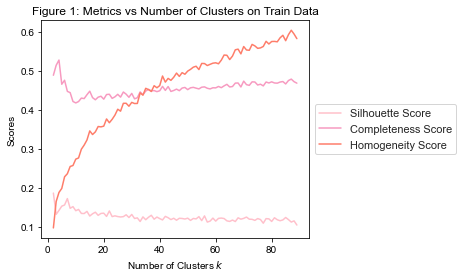

In [ ]:
# Number of clusters used
clusterNos = range(2, 90)

# Setting plot dimensions and grids
fig = plt.figure()
ax = plt.subplot(111)
sns.set(rc = {'figure.figsize':(14,7)})
sns.set_style("whitegrid")

# Plotting the required
plt.plot(clusterNos, silScoreTrain, color = 'pink')
plt.plot(clusterNos, compScoreTrain, color = '#f79AC0')
plt.plot(clusterNos, homogScoreTrain, color = '#fE7D6A')
plt.title('Figure 1: Metrics vs Number of Clusters on Train Data')
plt.xlabel('Number of Clusters $k$')
plt.ylabel('Scores')

# Shrinking the current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Placing the legend to the right of the current axis
ax.legend(['Silhouette Score', 'Completeness Score', 'Homogeneity Score'], loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.show()

###### One Hot Encoding Attempt

In [ ]:
dfDrop = train.drop(columns = ['Year'])

In [ ]:
dfOHC = pd.get_dummies(dfDrop, columns=["Genre"])

In [ ]:
kmeans = KMeans(3)
clusters = kmeans.fit_predict(dfOHC)
labels = pd.DataFrame(clusters)
labeledData = pd.concat((dfDrop,labels),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [ ]:
metrics.silhouette_score(attributes, kmeans.labels_)

0.29029972768797985

Using the two different methods to convert the labels (genre) to numerical labels, it can be seen that the obtained silhouette scores remain more or less the same. 

*Observations Obtained from Applying K-Means Clustering on the Training Set*

To cover a broad range of potential cluster numbers, k-means clustering was done for 90 clusters. The performance of each was measured using the previously described metrics with Figure 1 illustrating the same. If the K-Means clustering approach were successful, there would be 86 clusters scoring best as this is what the target variable describes as the number of unique scores. However, as per the graph, it can be estimated that the most optimum number of clusters would be around 86 as well, which matches the origial information obtained from the target variable. However, there is no cluster number for which all three scores are above at least a value of 0.5. Hence, it can be concluded that this model does not perform adequately for this dataset.  

<br>

##### K-Means Clustering on the Test Set

*K-Means performance*

The performance of K-Means can be determined by looking at the inertia score - the sum of the squared distances between each training instance and its closest centroid. This means that a lower inertia is favorable. As the score obtained is around 1 million, it can be said that the developed model performs poorly on the training set. 

In [ ]:
kmeans.inertia_

1184326.376474882

In [ ]:
kmeansTrain = [cluster.KMeans(n_clusters = k, random_state = 42).fit(attributes)
               for k in range(1, 113)]
inertias = [model.inertia_ for model in kmeansTrain]

*Finding the optimal number of clusters*

Creating a number of models with varying values of K and calculating the inertia for each one.

In [ ]:
# Preparing the expected outcome dataframe to have the same number of rows as the test dataframe
outcomeTest = train[['Genre']].drop_duplicates()
outcomeTest = outcomeTest.append(outcomeTest[0:27])

In [ ]:
attributesTest = test # Stores the attributes affecting genres

In [ ]:
dataTest = scale(attributesTest)

In [ ]:
kmeansTest = [cluster.KMeans(n_clusters = k, random_state = 42).fit(attributesTest)
                for k in range(1, 113)]
inertiasTest = [model.inertia_ for model in kmeansTest]

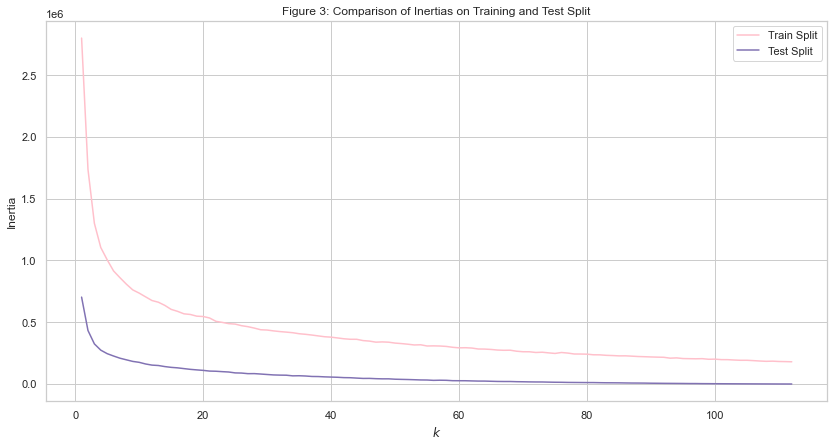

In [ ]:
plt.plot(range(1, 113), inertias, color = "pink")
plt.plot(range(1, 113), inertiasTest, "m")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.legend(['Train Split', 'Test Split'])
plt.title('Figure 3: Comparison of Inertias on Training and Test Split')
plt.show()

Acording to the above graph, the inertia obtained from both the training and testing datasets are quite high, however, the model appears to predict better on the test data set. This can be further confirmed by examining the metrics obtained from the same. 

<br>

*Calculating the scores of the model from the test data set.*

In [ ]:
# K Means Clustering for different cluster numbers and finding the scores for each to plot a graph
silScoreTest = []
for k in range(2, 90):
    kmeans = cluster.KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(attributesTest)
    silScoreTest.append(metrics.silhouette_score(attributesTest, kmeans.labels_))
    

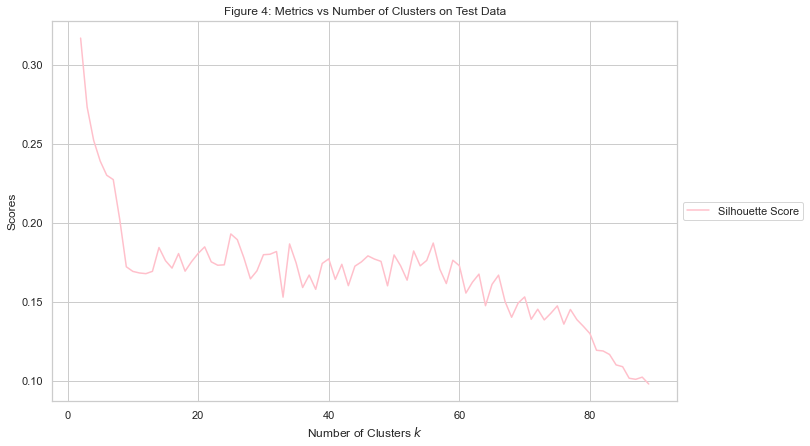

In [ ]:
# Setting plot dimensions and grids
fig = plt.figure()
ax = plt.subplot(111)
sns.set(rc = {'figure.figsize':(14,7)})
sns.set_style("whitegrid")
plt.plot(range(2, 90), silScoreTest, color = 'pink')
plt.title('Figure 4: Metrics vs Number of Clusters on Test Data')
plt.xlabel('Number of Clusters $k$')
plt.ylabel('Scores')

# Shrinking the current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Placing the legend to the right of the current axis
ax.legend(['Silhouette Score'], loc = 'center left', bbox_to_anchor=(1, 0.5))

plt.show()

Figure 2 depicts the scores obtained from the model upon application on the test data set. However, the number of clusters is still quite large, at approximately, 113 as illuminated by both the above figure and the code determinging the number of unique scores. This further proves that this model is not as successful. 

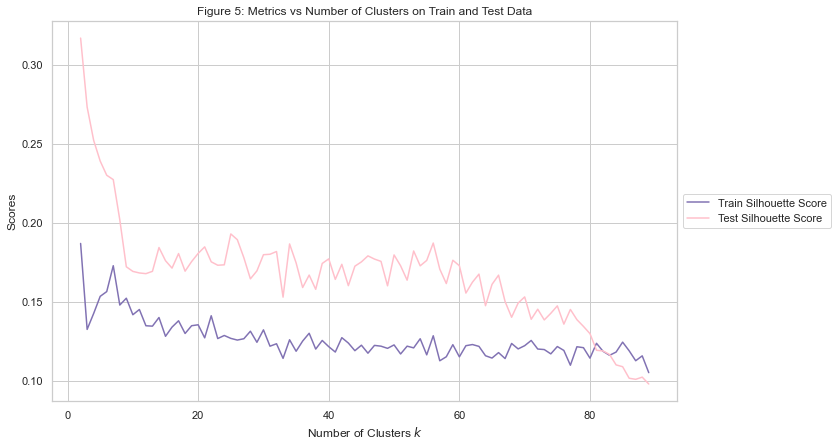

In [ ]:
# Setting plot dimensions and grids
fig = plt.figure()
ax = plt.subplot(111)
sns.set(rc = {'figure.figsize':(14,7)})
sns.set_style("whitegrid")

plt.plot(range(2, 90), silScoreTrain, color = 'm')
plt.plot(range(2, 90), silScoreTest, color = 'pink')
plt.title('Figure 5: Metrics vs Number of Clusters on Train and Test Data')
plt.xlabel('Number of Clusters $k$')
plt.ylabel('Scores')

# Shrinking the current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Placing the legend to the right of the current axis
ax.legend(['Train Silhouette Score', 'Test Silhouette Score'], loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.show()

Figure 3 offers a comparison of the scores obtained on both the training and testing data sets. 

In conclusion, the K Means model does not perform to a sufficient standard. 

##### Classification: Logistic Regression

A logistic regression model predicts a binary outcome based on the prior observations of the input data. Although our data is not made of binary conditions, it can be set up as one by posing conditions such as whether the data is one number or not. The output of this method can be determined by which condition provides the greatest probability of occurrence. 

In [ ]:
data = scale(attributes)

Segmenting the data to a training and tesing set with a 80/20 split.


In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(attributes, outcome, random_state=0, test_size = 0.2, train_size = 0.8)

In [ ]:
logReg = LogisticRegression(C = 0.5)
logReg.fit(xTrain, yTrain)
y_pred = logReg.predict(xTest)
print(logReg.__class__.__name__, accuracy_score(yTest, y_pred))

LogisticRegression 0.23863636363636365


The accuracy score obtained using a Logistic Regression model is quite poor. A low accuracy score indicates that the target label has no linear correlation with the features. In such instances, the logistic regression model cannot predict the targets with good accuracy. Potential improvements to the model can be introduced by performing furthe hyperparameter tuning. 

##### *Logistic Regression: Test Dataset*

In [ ]:
y_predLog = logReg.predict(test)

Score on Test Set (Kaggle): 0.32

##### *Logistic Regression + Grid Search CV: Train Dataset*

One improvement that can be made to the existing Logistic Regression model is to combine it with a Grid Search Cross Validation model. 

In [ ]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

logregCV = GridSearchCV(estimator = LogisticRegression(solver='liblinear'),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

logregCVFit = logregCV.fit(xTrain, yTrain)

In [ ]:
y_predCV = logregCV.predict(xTest)
print(logregCV.__class__.__name__, accuracy_score(yTest, y_predCV))

GridSearchCV 0.25


##### *Logistic Regression + Grid Search CV: Test Dataset*

In [ ]:
y_predCV = logregCV.predict(test)

In [ ]:
finalPredictions = pd.Series(data = y_predCV, index = Id)
finalPredictions.name = "top genre"
finalPredictions.to_csv("CS98XClassificationTestPredictions.csv")

Score on Test Set (Kaggle): 0.35

An improvement can be seen in the model accuracy, however, this new score is still not as favorable and has room for improvement. 

#### **Classification: K Nearest Neighbors (KNN)**

This method uses proximity measures (distances between points) to determine the class of an individual data point.


In [ ]:
kNN = KNeighborsClassifier(leaf_size = 20)

In [ ]:
kNN.fit(xTrain, yTrain)
y_pred = kNN.predict(xTest)
print(kNN.__class__.__name__, accuracy_score(yTest, y_pred))

KNeighborsClassifier 0.29545454545454547


Like the Logistic Regression model, the KNN model does not perform as well as anticipated. Some improvements that can be made are by further hyperparameter training or by using Grid Search Cross Validation models as well. 

In [ ]:
param_grid_knn = {
    'n_neighbors': [2, 5, 10, 15],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}
kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = param_grid_knn, verbose=1, cv=10, n_jobs=-1)
kNNModel_grid.fit(xTrain, yTrain)
y_pred = kNNModel_grid.predict(xTest)
print(kNNModel_grid.__class__.__name__, accuracy_score(yTest, y_pred))

Fitting 10 folds for each of 64 candidates, totalling 640 fits
GridSearchCV 0.2840909090909091


###### K Nearest Neighbors: Test Dataset

In [ ]:
y_predKNN = kNNModel_grid.predict(test)

There appears to be no improvement in the scores obtained after using GridSearchCV along with the developed KNN model. 

#### Classification: Decision Tree

Decision Trees are a supervised machine learning algorithm that predict the target variable, in this case, 'Genre'. Due to the large number of features as seen from the K Means, a decision tree classifier felt appropriate due to the complexity of the dataset. 

In [ ]:
#Training the model - Variation 1
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
dt.fit(xTrain, yTrain)

#Making predictions on the test set
dtPredictions = dt.predict(xTest)
dt_predictions_test = dt.predict(test)
dtPredictions

metrics.accuracy_score(yTest, dtPredictions)

0.2159090909090909

The first variation of the Decision Tree model produced an accuracy of 0.21. With default paramaters, the decision tree is extremely hard to dissect. On the fourth and fifth levels, the tree produces a number of unneccessary children that collide with each other. This is most likely due to the fact that the 'Genre' category has similiar categories containing the same theme e.g. "rock", "folk", "pop". A similar pattern was also observed in the K Means clustering algorithm. Grid search with cross validation was then used to find optimal values for the Decision Tree.

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'random_state': [42],
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(),
                              params,
                              cv=3)
decTreeCV = grid_search_cv.fit(xTrain, yTrain)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [ ]:
#Training the model - Variation 2
dtPredictions = grid_search_cv.predict(test)
#metrics.accuracy_score(yTest, dtPredictions)

In [ ]:
DT_predictions = pd.Series(data=dtPredictions, index=Id)
DT_predictions.name = "top genre"
DT_predictions.to_csv("CS98XClassification_DT_TestPredictions.csv")

Grid search best estimator was used to fine tune the model using the max_depth (2) and max_leaf_nodes (4). Pruning the tree lead to an increase of just under 0.6%, but logistic regression with grid search cross validation still outperforms this model (0.35 > 0.27). 





#### Classification: Random Forest

Random forest is an ensemble method of machine learning that uses multiple instances of decision trees to search for the best feature among a random subset of features. Given that the decision tree improved with adjusted parameters, it was thought that random forest would build on this increase by further exploring all possible best features.

In [ ]:
#Training the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=4, n_estimators = 1000, random_state = 0)
rf.fit(xTrain, yTrain)

#Making predictions on the test set 
rfPredictions = rf.predict(xTest)
rfPredictions_test = rf.predict(test)
metrics.accuracy_score(yTest, rfPredictions)

0.32954545454545453

In [ ]:
DT_predictions = pd.Series(data=rfPredictions_test, index=Id)
DT_predictions.name = "top genre"
DT_predictions.to_csv("CS98XClassificationRFTestPredictions.csv")

When employing random forests in conjunction with decision tree, the accuracy score increases to 0.34%. Therefore, forcing the the model to choose from a random subset of features yields a higher score.

#### Classification: Voting Classifier
Using this method, classifiers are trained independently then are combined, the predictions of which are aggregated and the majority outcome is selected based on weights applied to the class or class probabilites. A class label is then assigned to a record based on majority vote. This method often achieves a higher accuracy than the best individual classifier. There are two different types of voting classifier:

1. Hard voting classifier
2. Soft voting classifier

###### Hard Voting
Hard voting involves summing all the predictions for each class label. It then predicts the class label with the most votes. This classification is usually completed based on the mode of all the predictions mad by different classifiers. 

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(attributes, outcome, random_state=0, test_size = 0.3, train_size = 0.7)

In [ ]:
votingClf = VotingClassifier(estimators=[('lr', logregCV), ('kNN', kNN), ('tree', dt), ('randFor', rf)],voting = 'hard')

In [ ]:
voteClfHardFit = votingClf.fit(xTrain, yTrain)

In [ ]:
for clf in (logregCV, kNN, dt, votingClf, rf):
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, yPred))

GridSearchCV 0.26515151515151514
KNeighborsClassifier 0.2727272727272727
DecisionTreeClassifier 0.12878787878787878
VotingClassifier 0.29545454545454547
RandomForestClassifier 0.3181818181818182


##### Voting Classifier on Test Set - Hard Voting

In [ ]:
yPredVC = votingClf.predict(test)

Score on Test Set (Kaggle): 0.30

###### Soft Voting
Soft voting involves summing the predicted probabilities and weights associated for each class label and predicting the class label with the largest probability.

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(attributes, outcome, random_state=0, test_size = 0.3, train_size = 0.7)

In [ ]:
# Defining the VotingClassifier allowing soft voting
votingClf = VotingClassifier(estimators=[('lr', logregCV), ('kNN', kNN), ('tree', dt), ('randFor', rf)],voting = 'soft')

In [ ]:
# Train the models
votingClf.fit(xTrain, yTrain)

# Print out the accuracy score of the inidividual classifiers and the voting classifiers
for clf in (logregCV, kNN, votingClf, rf, dt):
    clf.fit(xTrain, yTrain)
    y_pred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, y_pred))
    
print()

GridSearchCV 0.26515151515151514
KNeighborsClassifier 0.2727272727272727
VotingClassifier 0.1590909090909091
RandomForestClassifier 0.3181818181818182
DecisionTreeClassifier 0.12878787878787878



##### Voting Classifier on Test Set - Soft Voting

In [ ]:
yPredVC = votingClf.predict(test)

In [ ]:
final_predictions = pd.Series(data=yPredVC, index=Id)
final_predictions.name = "top genre"
final_predictions.to_csv("CS98XClassificationTestPredictions.csv")

##### Voting Classifier Grid Search CV

In [ ]:
eclf = VotingClassifier(estimators=[ 
    ('lr', logregCV),
    ('kNN', kNN),
    ('tree', dt),
    ('randFor', rf),
    ], voting='soft')

#Use the key for the classifier followed by __ and the attribute
params = {'lr__estimator__C': [1.0, 100.0],
      'kNN__n_neighbors': [5, 6, 7],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=2)

voteGrid = grid.fit(xTrain,yTrain)

In [ ]:
y_pred = grid.predict(xTest)
print(grid.__class__.__name__, accuracy_score(yTest, y_pred))

GridSearchCV 0.3106060606060606


##### Voting Classifier Grid Search CV on Test Set

In [ ]:
# On Test Set
y_pred = grid.predict(test)

### Observations & Conclusions

A number of models were developed and tested against the provided test data set. Of the models tested, the best-performing one was the Logistic Regression model coupled with Grid Search Cross Validation techniques. Different parameters were tested by applying a vector of all possible solvers, penalties, and C values. This was done to obtain the most optimal results. Logistic Regression is a well-performing baseline approach to classification, further improving the same with Grid Search techniques to enhance the model. Applying rigid hyperparameters to this model is potentially what caused its ultimate gain on the other trained models. Upon uploading the obtained results to Kaggle, a score of 0.35 was returned. Although there is room for improvement, using the applied EDA methods, this was the best-performing model.